In [1]:
import os
import dill
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline


In [2]:
df1 = pd.read_csv("../../select_BL/selected.csv")
df2 = pd.read_csv('summary.csv')

In [3]:
# Set the path to the BondLengths directory
bond_lengths_path = os.path.abspath("../")

# Regex pattern to match folders in the format "completed_BL_\d+p\d+"
pattern = re.compile(r"^completed_BL_\d+p\d+$")

# Initialize a list to store results
fun_values = []

# Iterate through all items in the BondLengths directory
for item in sorted(os.listdir(bond_lengths_path)):
    # Check if the item matches the pattern and is a directory
    if pattern.match(item) and os.path.isdir(os.path.join(bond_lengths_path, item)):
        folder_path = os.path.join(bond_lengths_path, item, "vqe_result.pkl")
        
        # Read the .pkl file and extract res['fun']
        try:
            with open(folder_path, "rb") as file:
                res = dill.load(file)
                fun_values.append(res['fun'])
        except Exception as e:
            print(f"Error reading {folder_path}: {e}")

# Create a DataFrame from the collected fun values
df3 = pd.DataFrame(fun_values, columns=['optim_fun'])

In [5]:
# Concatenate the columns from the second DataFrame to the first DataFrame
df = pd.concat([df1, df2, df3], axis=1)
df

,BL,Completed,Naive (est),Naive (err_bound),IAE without Bayesian (est),IAE without Bayesian (err_bound),IAE with Bayesian (est),IAE with Bayesian (err_bound),Naive_fixed_shots (est),Naive_fixed_shots (err_bound),Naive (total_sc),IAE without Bayesian (total_sc),IAE with Bayesian (total_sc),optim_fun
0,0.60,1,-1.054175,0.009188,-1.055497,0.008197,-1.055085,0.007783,-1.072462,0.078790,189520050,1484913.30,1338023.55,-1.053723
1,0.68,1,-1.100422,0.008752,-1.102051,0.008436,-1.101784,0.008175,-1.114665,0.077163,189256000,1494442.75,1339927.95,-1.100360
2,0.80,1,-1.148722,0.008608,-1.150087,0.008216,-1.149727,0.007856,-1.161964,0.073825,189185950,1479148.35,1314489.25,-1.148556
3,1.15,1,-1.163996,0.007990,-1.165508,0.008084,-1.165133,0.007697,-1.173355,0.071220,189010700,1474665.60,1311576.50,-1.164084
4,1.55,1,-1.089037,0.007705,-1.090247,0.007976,-1.089727,0.007904,-1.095071,0.075377,189388050,1457939.70,1295400.00,-1.089198
5,1.63,1,-1.071188,0.007757,-1.072445,0.007998,-1.071718,0.007878,-1.077174,0.076078,189519650,1461033.85,1303931.20,-1.071336
6,2.10,1,-0.969960,0.007608,-0.970511,0.007871,-0.970181,0.007785,-0.972223,0.087494,190801900,1456564.50,1299001.45,-0.970121
7,2.58,1,-0.888154,0.007497,-0.888398,0.007807,-0.888013,0.007512,-0.884807,0.099323,194720700,1508686.75,1351695.70,-0.888204
8,3.05,1,-0.834973,0.007399,-0.834756,0.007828,-0.834905,0.007504,-0.830315,0.109714,199252700,1515732.50,1356178.65,-0.835129
9,3.52,1,-0.802405,0.007277,-0.802550,0.007828,-0.802802,0.007377,-0.796809,0.111446,201741950,1505159.65,1332436.70,-0.802515


In [6]:
# Calculate improvement percentages
improvement_percentages = [(val2 - val3) / val2 * 100 for val2, val3 in zip(df['IAE without Bayesian (total_sc)'], df['IAE with Bayesian (total_sc)'])]

C:\Users\qilin\AppData\Local\Temp\ipykernel_37376\232757131.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


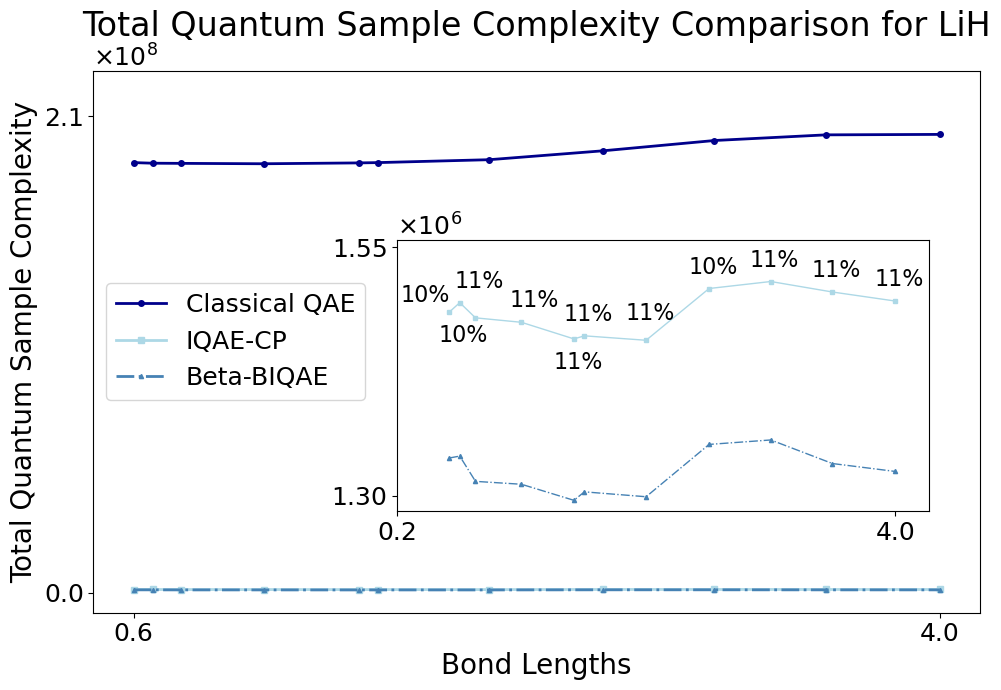

In [7]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Create main figure
fig, ax = plt.subplots(figsize=(10, 7))

# Plot three curves
ax.plot(df['BL'], df['Naive (total_sc)'], label='Classical QAE', marker='o', color='#00008b', linewidth=2, markersize=4)
ax.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=2, markersize=4)
ax.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=2, markersize=3)

# Axis labels and title
ax.set_xlabel('Bond Lengths', fontsize=20)
ax.set_ylabel('Total Quantum Sample Complexity', fontsize=20)
ax.set_title('Total Quantum Sample Complexity Comparison for LiH', fontsize=24)

# Legend
ax.legend(loc='center left', fontsize=18)

# Create inset plot
ax_inset = inset_axes(ax, width="100%", height="100%", loc="upper right",
                      bbox_to_anchor=(0.35, 0.2, 0.6, 0.5), bbox_transform=ax.transAxes)

ax_inset.plot(df['BL'], df['IAE without Bayesian (total_sc)'], label='IQAE-CP', marker='s', color='#add8e6', linewidth=1, markersize=3)
ax_inset.plot(df['BL'], df['IAE with Bayesian (total_sc)'], label='Beta-BIQAE', marker='^', color='#4682b4', linestyle='-.', linewidth=1, markersize=3)

# Adjust inset axis limits
ax_inset.set_xlim([ax_inset.get_xlim()[0] - 0.05, ax_inset.get_xlim()[1] * 1.02])
ax_inset.set_ylim([ax_inset.get_ylim()[0] - 0.05, ax_inset.get_ylim()[1] * 1.02])

# Ticks for main plot
ax.set_xticks([df['BL'].iloc[0],  np.float64(4.0)])
ax.set_yticks([np.float64(0.0),  np.float64(2.1e8)])
ax.set_ylim(top=2.3*10**8)
ax.tick_params(axis='both', labelsize=18)

# Ticks for inset
ax_inset.set_yticks([np.float64(1.30e6), np.float64(1.55e6)])
ax_inset.set_xticks([np.float64(0.2), np.float64(4.0)])
ax_inset.set_xticklabels([np.float64(0.2), np.float64(4.0)])  # Hide x-tick labels
ax_inset.tick_params(axis='both', labelsize=18)

# Move y-axis to left
ax_inset.yaxis.tick_left()
ax_inset.yaxis.set_label_position("left")

# Format y-axis in scientific notation
ax_inset.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_inset.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Format y-axis scientific notation text size
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.offsetText.set_fontsize(18)
ax_inset.yaxis.offsetText.set_fontsize(18)

# Annotation text
x_offsets = [-0.18, 0.03, 0.03, 0.1, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
y_offsets = [0.5e4, -4.5e4, 2.5e4, 1e4, -3.5e4, 1e4, 1.5e4, 1e4, 1e4, 1e4, 1e4]

for i, (x, y, improvement) in enumerate(zip(df['BL'], df['IAE without Bayesian (total_sc)'], improvement_percentages)):
    ax_inset.text(x + x_offsets[i], y + y_offsets[i], f"{improvement:.0f}%", 
                  ha='center', va='bottom', fontsize=16)

# Save and show
plt.tight_layout()
plt.savefig('total_sc.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


### 2 Plot the Estimated Curves

In [8]:
# Loading the CSV file
df_curve = pd.read_csv('../../exact_curve/exact_curve.csv')

# Calculating the Total Energy
df_curve['TE'] = df_curve['NRE'] + df_curve['EE']

In [9]:
# Perform exact match
df_merged = df.merge(df_curve[['BL', 'NRE']], on='BL', how='left')

# Check which rows have missing NRE values and need interpolation
mask = df_merged['NRE'].isna()

# Prepare for interpolation
# Extract BL and NRE from df_curve
x = df_curve['BL']
y = df_curve['NRE']

# Interpolate NRE values for the BLs that are missing NRE in df
interpolated_nre = np.interp(df_merged.loc[mask, 'BL'], x, y)

# Fill in the interpolated results
df_merged.loc[mask, 'NRE'] = interpolated_nre


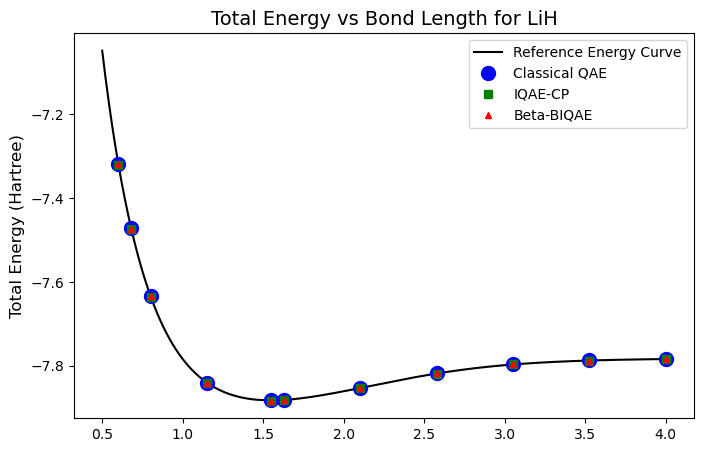

In [10]:


# For optim res
spline_optim_res = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['optim_fun'] + df_merged['NRE'], k=4)  # Quartic spline (k=4)
optim_res = spline_optim_res(df_curve['BL'])

# Create a figure with a specified size
plt.figure(figsize=(8, 5))  # Width = 10 inches, height = 6 inches

# Plot the Total Energy curve
plt.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black')
#plt.plot(df_curve['BL'], optim_res, label='Optimization Result', color='purple', zorder=5, linewidth=0.8)

# Plot the Naive approach, IQAE, and Bayesian IQAE as dots
plt.plot(df_merged['BL'], df_merged['Naive (est)'] + df_merged['NRE'],
         label='Classical QAE', marker='o', color='blue', linestyle='None', markersize=10)

plt.plot(df_merged['BL'], df_merged['IAE without Bayesian (est)'] + df_merged['NRE'],
         label='IQAE-CP', marker='s', color='green', linestyle='None', markersize=6)

plt.plot(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
         label='Beta-BIQAE', marker='^', color='red', linestyle='None', markersize=4)

# Add labels and legend
#plt.xlabel('Bond Length (Å)', fontsize=12)
plt.ylabel('Total Energy (Hartree)', fontsize=12)
plt.title('Total Energy vs Bond Length for LiH', fontsize=14)
plt.legend(fontsize=10)

#plt.ylim(-98.8, -97.8)

# Save the figure
plt.savefig('justify_acc.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### 3 Comparison of Accuracies with Fixed Sample Complexity

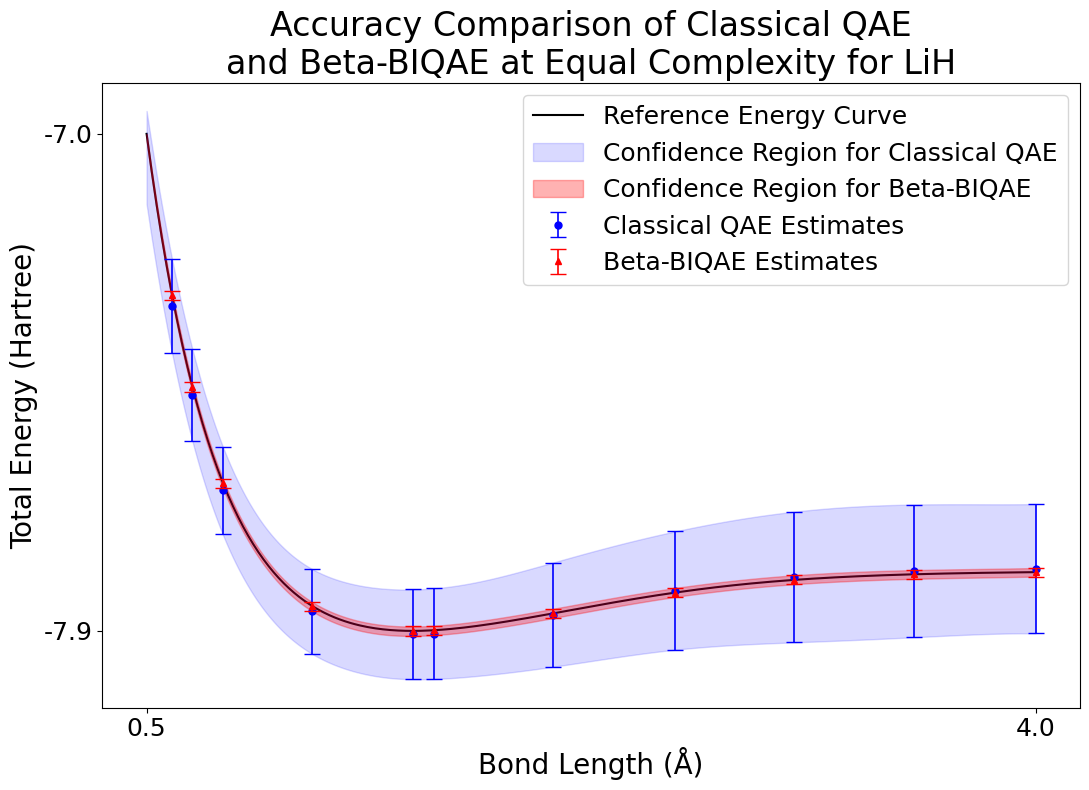

In [11]:
from matplotlib.ticker import FormatStrFormatter
# Create spline functions for the estimates and their error bounds
spline_naive_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'], k=4)
spline_naive_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['Naive_fixed_shots (err_bound)'], k=4)
spline_bayes_est = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'], k=4)
spline_bayes_err = InterpolatedUnivariateSpline(df_merged['BL'], df_merged['IAE with Bayesian (err_bound)'], k=4)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(11, 8))  # Slightly larger canvas

# For Naive
naive_est = spline_naive_est(df_curve['BL'])
naive_upper = naive_est + spline_naive_err(df_curve['BL'])
naive_lower = naive_est - spline_naive_err(df_curve['BL'])

# For Bayesian
bayes_est = spline_bayes_est(df_curve['BL'])
bayes_upper = bayes_est + spline_bayes_err(df_curve['BL'])
bayes_lower = bayes_est - spline_bayes_err(df_curve['BL'])

# Plot the reference curve
ax.plot(df_curve['BL'], df_curve['TE'], label='Reference Energy Curve', color='black', zorder=1)

# Confidence regions
ax.fill_between(df_curve['BL'], naive_lower, naive_upper, color='blue', alpha=0.15,
                label='Confidence Region for Classical QAE', zorder=2)
ax.fill_between(df_curve['BL'], bayes_lower, bayes_upper, color='red', alpha=0.30,
                label='Confidence Region for Beta-BIQAE', zorder=3)

# Error bars for estimates
ax.errorbar(df_merged['BL'], df_merged['Naive_fixed_shots (est)'] + df_merged['NRE'],
            yerr=df_merged['Naive_fixed_shots (err_bound)'],
            fmt='o', label='Classical QAE Estimates', color='blue',
            capsize=6, ecolor='blue', elinewidth=1.2, markersize=5, zorder=4)

ax.errorbar(df_merged['BL'], df_merged['IAE with Bayesian (est)'] + df_merged['NRE'],
            yerr=df_merged['IAE with Bayesian (err_bound)'],
            fmt='^', label='Beta-BIQAE Estimates', color='red',
            capsize=6, ecolor='red', elinewidth=1.2, markersize=5, zorder=5)

# Title (split in two lines)
ax.set_title('Accuracy Comparison of Classical QAE\nand Beta-BIQAE at Equal Complexity for LiH', fontsize=24)

# Axis labels
ax.set_xlabel('Bond Length (Å)', fontsize=20)
ax.set_ylabel('Total Energy (Hartree)', fontsize=20)

# Ticks — only min and max values
ax.set_xticks([df_curve['BL'].min(), df_curve['BL'].max()])
ax.set_yticks([df_curve['TE'].min(), df_curve['TE'].max()])

# Format y-axis tick labels to 1 decimal place
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Tick label font sizes
ax.tick_params(axis='both', labelsize=18)

# Legend
ax.legend(loc='upper right', fontsize=18)

# Save and show
plt.tight_layout()
plt.savefig('compare_acc.png', dpi=300, bbox_inches='tight')
plt.show()

### 4 Estimates at the Equilibrium Bond Length

In [13]:
equi_row = df_merged[abs(df_merged['BL'] - 1.55) < 0.00001]

print(f"Numpy: {df_curve.loc[abs(df_curve['BL'] - 1.55) < 0.00001, 'TE'].iloc[0]:.3f}")
print(f"Minimization: {equi_row['optim_fun'].iloc[0] + equi_row['NRE'].iloc[0]:.3f}")
print(f"Classical QAE approach: ${equi_row['Naive (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['Naive (err_bound)'].iloc[0]:.3f}$")
print(f"IAE without Bayesian approach: ${equi_row['IAE without Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['IAE without Bayesian (err_bound)'].iloc[0]:.3f}$")
print(f"IAE with Bayesian approach: ${equi_row['IAE with Bayesian (est)'].iloc[0] + equi_row['NRE'].iloc[0]:.3f} \\pm {equi_row['IAE with Bayesian (err_bound)'].iloc[0]:.3f}$")

print("Average multiplicative improvement is: ",sum((naive_upper - naive_lower) / (bayes_upper - bayes_lower)) / len(bayes_lower))

Numpy: -7.883
Minimization: -7.883
Classical QAE approach: $-7.882 \pm 0.008$
IAE without Bayesian approach: $-7.884 \pm 0.008$
IAE with Bayesian approach: $-7.883 \pm 0.008$
Average multiplicative improvement is:  12.126979630903657
